In [17]:
import mdm
import seaborn as sns
sns.set()

In [18]:
model_name = 'gb_v2'

## import data

In [19]:
raw_data = mdm.datas.get("../data/", "dataset.csv")
data = mdm.datas.transform(raw_data)
X_train, y_train, X_dev, y_dev, X_test, y_test = mdm.datas.split(data, 'activity',  pct_test=0.2)

2021-05-14 08:49:15,864 | INFO : log volume
2021-05-14 08:49:15,871 | INFO : log density
2021-05-14 08:49:15,874 | INFO : log weight
2021-05-14 08:49:15,884 | INFO : train size : 720
2021-05-14 08:49:15,885 | INFO : dev size : 90
2021-05-14 08:49:15,886 | INFO : test size : 90


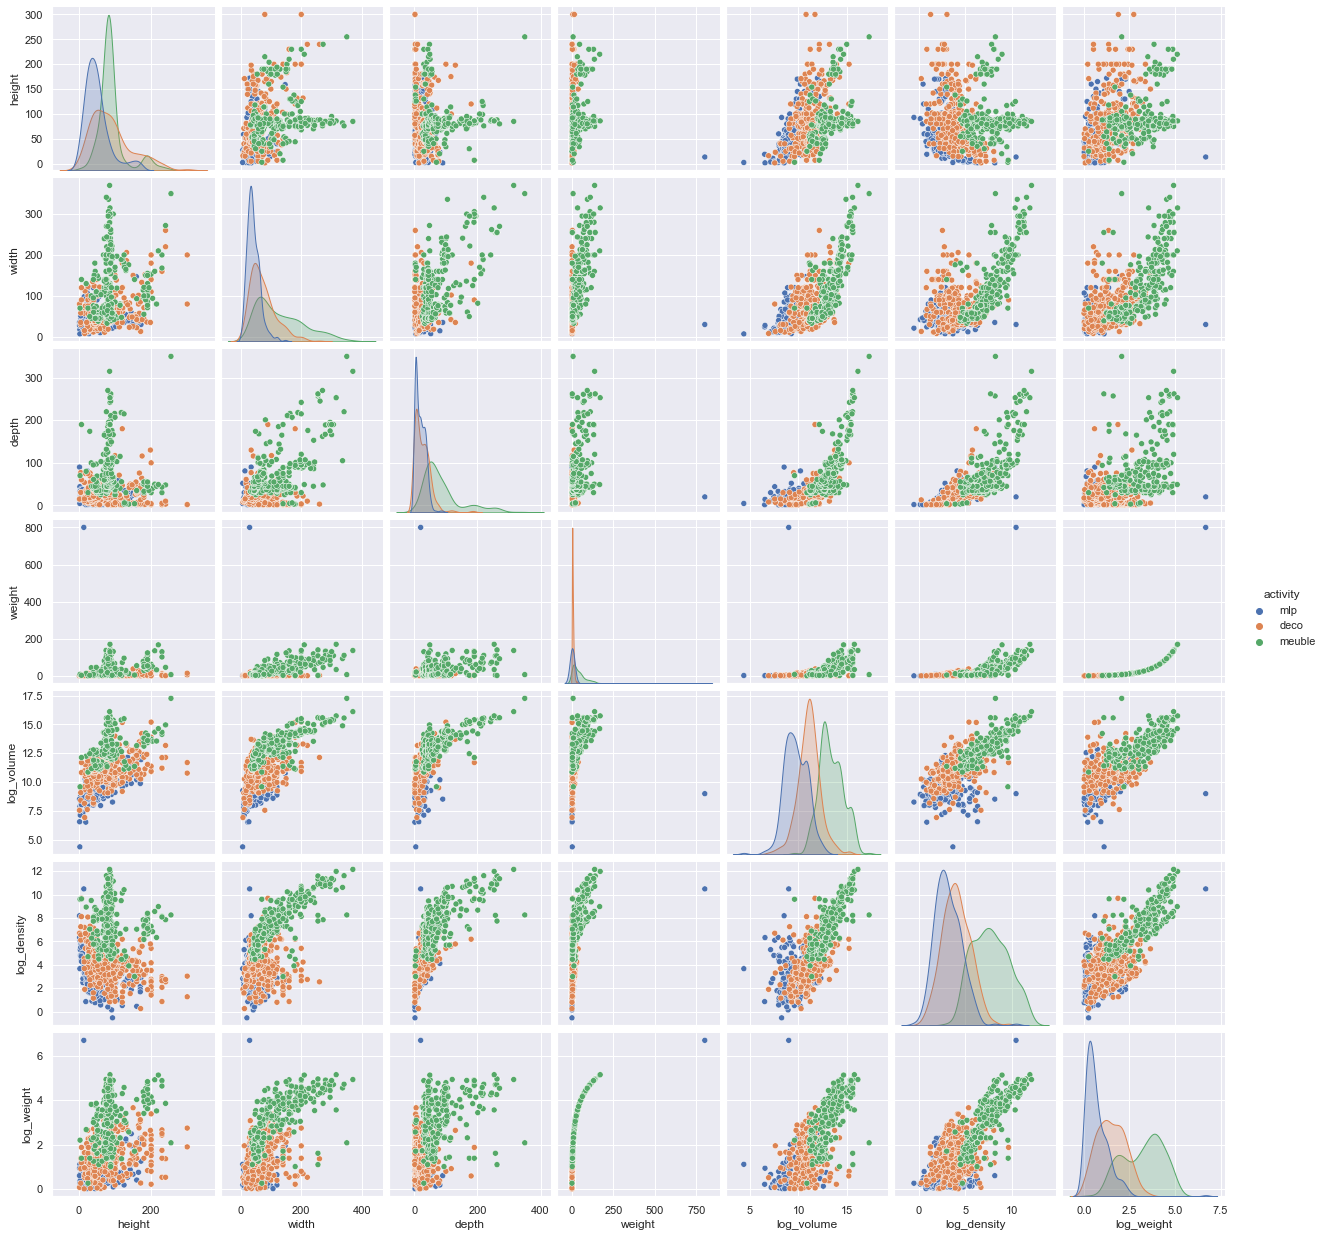

In [20]:
sns.pairplot(data, hue='activity')

## train model

In [23]:
acc, model = mdm.models.train(X_train, y_train, X_dev.append(X_test), y_dev.append(y_test))

2021-05-14 08:53:28,223 | INFO : accuracy : 0.8277777777777777


In [24]:
val = mdm.models.evaluate(model, X_test, y_test)

2021-05-14 08:53:44,891 | INFO : accuracy : 0.8666666666666667


In [8]:
mdm.models.save(model, model_name)

2021-05-14 06:09:43,106 | INFO : saved to : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2


In [9]:
model = mdm.models.load(model_name)

2021-05-14 06:09:43,189 | INFO : loaded from : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2/gb_v2


## predict

In [25]:
preds = mdm.models.predict(model, X_dev.append(X_test))

In [26]:
test_set = X_dev.append(X_test)
test_set['preds'] = preds
test_set['activity'] = y_dev.append(y_test)

## error analysis

2021-05-14 08:53:55,900 | INFO : saving to : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2/confusion_matrix.png


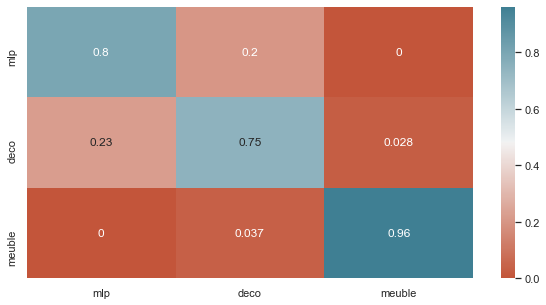

In [27]:
labels = ['mlp', 'deco', 'meuble']
mdm.visualisations.confusion_matrix(test_set.activity, test_set.preds, labels, model_name=model_name)

2021-05-14 06:09:46,713 | INFO : saving to : /Users/philippefraisse/Documents/WORK/test/mdm/mdm/../models/gb_v2/feature_importance.png


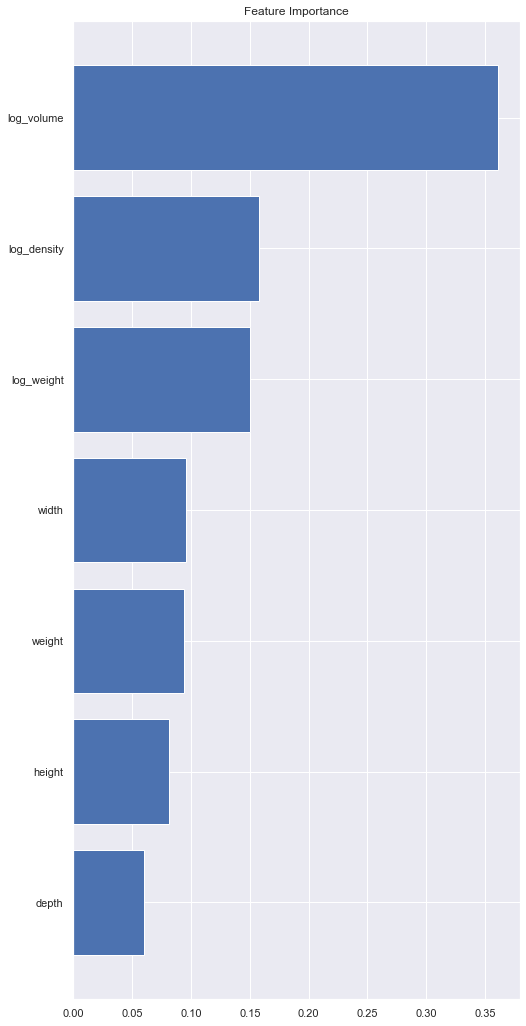

In [13]:
feats = X_train.columns
mdm.visualisations.feature_importance(model.feature_importances_, feats, model_name=model_name)

In [21]:
test_set['error_analysis'] = test_set.apply(lambda x: 'error' if x['activity'] != x['preds'] else x['activity'], axis=1)

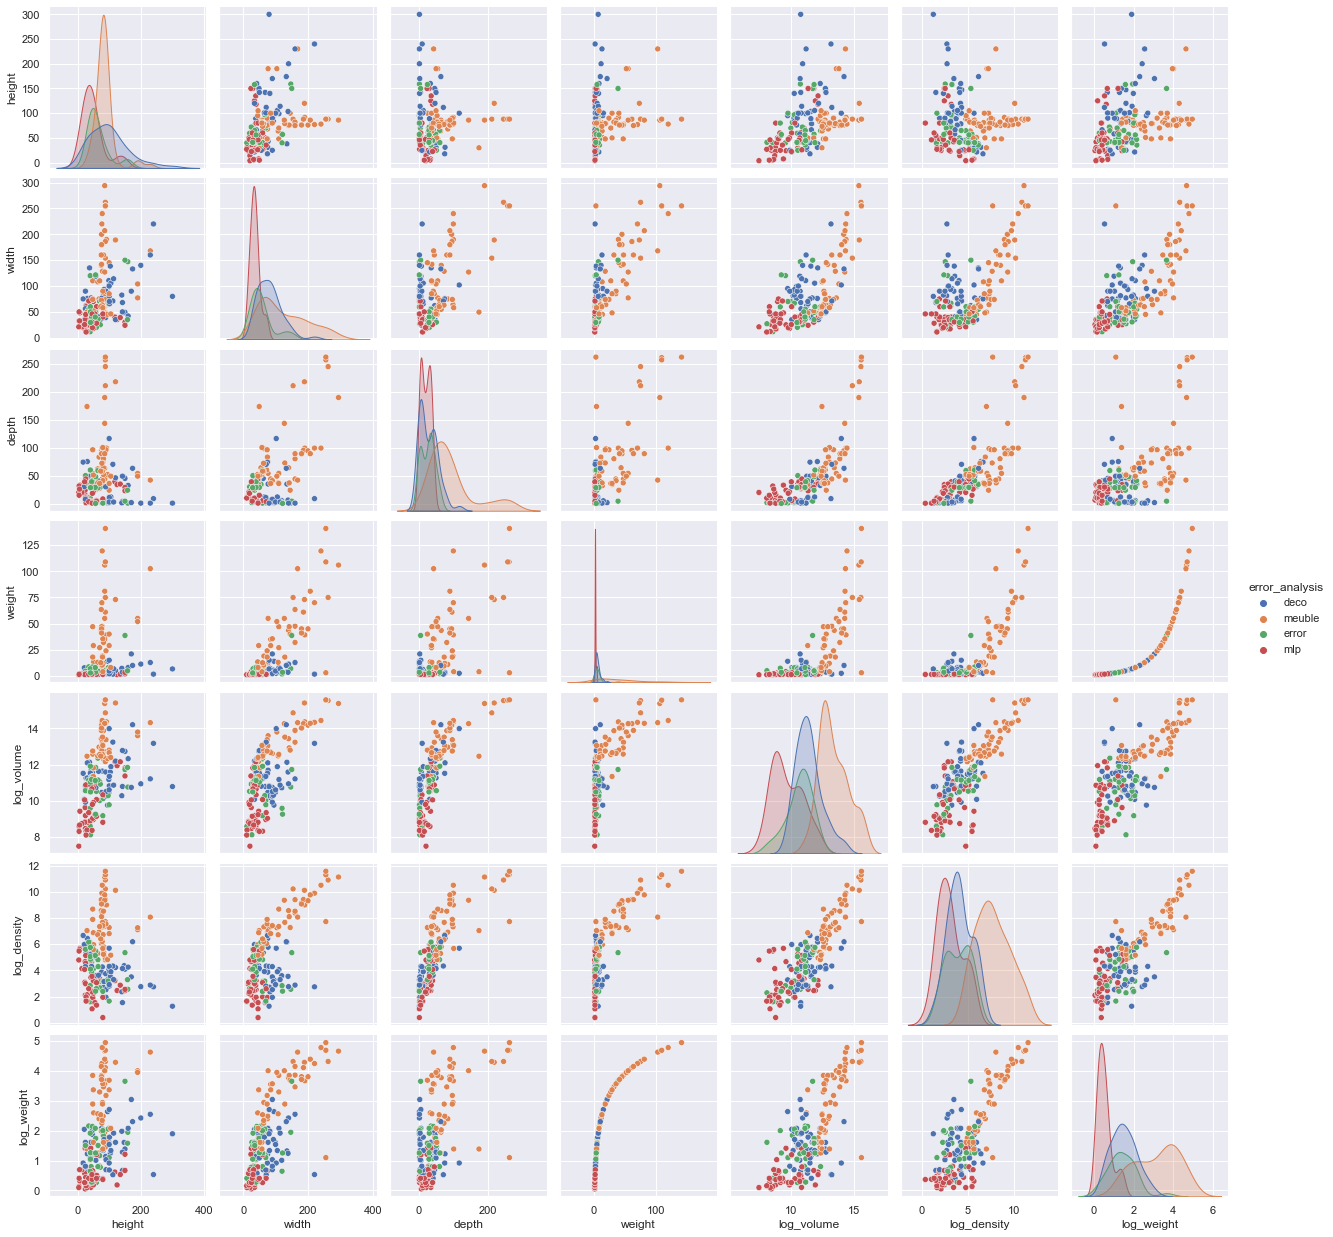

In [22]:
sns.pairplot(test_set[['height', 'width', 'depth', 'weight', 'log_volume', 'log_density', 'log_weight', 'error_analysis']], hue='error_analysis')

Errors are mostly on deco regarding the confusion matrix
This makes sense since it seems in the pair plot that the DECO is in the middle between mlp and meubles where there is the most ambiguity